<a href="https://colab.research.google.com/github/2840bongkoch/BSC_DPDM2025/blob/main/CH3_Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
flood = pd.read_csv('/content/drive/MyDrive/Data mining/flooding database.csv')
flood.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


# Data Cleaning

## Missing Data

In [4]:
flood.isnull().any()

,0
system:index,False
index,False
threshold_type,False
glide_index,True
dfo_country,False
dfo_other_country,True
dfo_centroid_x,False
dfo_centroid_y,False
dfo_began,False
dfo_ended,True


In [5]:
flood.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


### drop record ที่มี missing ออก

### check missing data

### Drop record ที่มี missing ออก

drop ถ้ามี missing

In [6]:
flood.shape

(913, 23)

In [7]:
flood_drop1 = flood.dropna()
flood_drop1.shape

(13, 23)

drop เฉพาะเกิด missing ในตัวแปรที่เราจะใช้

-dfo_country

-dfo_other_country

-dfo_began

-dfo_ended

-dfo_dead

-dfo_cause

-dfo_severity

In [8]:
flood_drop2 = flood.dropna(subset = ['dfo_country', 'dfo_other_country', 'dfo_began',
                                        'dfo_ended', 'dfo_dead', 'dfo_cause', 'dfo_severity'])
flood_drop2.shape

(637, 23)

In [9]:
flood_drop2.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


### เติม dummy

In [10]:
flood[flood.isnull()['dfo_other_country']]

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
172,DFO_2415_From_20040110_to_20040119,2415,std,0,Iran,NaN,51.439491,29.466641,1/10/04,1/19/04,...,Heavy rain,1.0,7017.61,23986.0,23986.0,116060,1,0,-92074,NaN
383,DFO_3089_From_20070530_to_20070603,3089,std,0,Dominican Republic,NaN,-71.053795,19.547861,5/30/07,6/3/07,...,Heavy rain,1.0,100.92,13819.0,13819.0,11672,1,0,2147,NaN
387,DFO_3097_From_20070611_to_20070624,3097,std,LS-2007-000080-BGD,Bangladesh,NaN,91.953546,22.397464,6/11/07,6/24/07,...,Heavy rain,1.0,20493.38,4536692.0,4536692.0,8995159,1,0,-4458467,NaN
412,DFO_3136_From_20070721_to_20071015,3136,std,0,Bangladesh,NaN,91.233643,23.916419,7/21/07,10/15/07,...,Heavy rain,1.0,78785.53,27712991.0,27712998.0,55288622,0,-7,-27575631,NaN
428,DFO_3166_From_20070726_to_20071010,3166,std,FL-2007-000132-BFA,Ghana,NaN,0.612005,13.037658,7/26/07,10/10/07,...,Heavy rain,1.5,7621.96,325408.0,325408.0,624312,1,0,-298904,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,DFO_4683_From_20180901_to_20181002,4683,std,NaN,Ghana,NaN,-1.066060,9.537550,9/1/18,10/2/18,...,Dam,1.5,1866.91,79032.0,38895.0,79032,1,40137,0,NaN
909,DFO_4695_From_20181023_to_20181027,4695,std,NaN,Mexico,NaN,-105.236000,23.721800,10/23/18,10/27/18,...,"Tropical Storm, Surge",1.5,2720.37,23128.0,15725.0,23128,1,7403,0,NaN
910,DFO_4703_From_20181029_to_20181107,4703,otsu,NaN,Paraguay,NaN,-57.085300,-25.342700,10/29/18,11/7/18,...,Heavy rain,1.0,10019.87,29435.0,25393.0,29435,1,4042,0,NaN
911,DFO_4704_From_20181124_to_20181129,4704,std,NaN,Vietnam,NaN,107.137000,11.491000,11/24/18,11/29/18,...,"Tropical Storm, Surge",1.0,6467.41,218916.0,173753.0,218915,0,45163,1,NaN


In [11]:
flood[~flood.isnull()['dfo_other_country']]

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,DFO_4516_From_20170908_to_20170919,4516,std,TC-2017-000132-CUB,USA,Cuba,-81.625156,28.594245,9/8/17,9/19/17,...,"Tropical Storm, Surge",2.0,9990.79,108896.0,92345.0,108883,0,16551,13,NaN
886,DFO_4581_From_20180310_to_20180314,4581,std,NaN,Croatia,Bosnia and Herzegovina,16.947210,44.734938,3/10/18,3/14/18,...,"Snowmelt, Ice, Rain",1.0,1564.28,53495.0,50783.0,53495,1,2712,0,NaN
893,DFO_4597_From_20180325_to_20180408,4597,std,NaN,Greece,Bulgaria,26.671405,41.531705,3/25/18,4/8/18,...,Heavy rain,1.5,2818.83,57706.0,51639.0,57706,1,6067,0,NaN
897,DFO_4640_From_20180625_to_20180711,4640,std,NaN,India,Pakistan,75.143900,33.375200,6/25/18,7/11/18,...,Heavy rain,1.0,2104.94,224236.0,60172.0,224236,1,164064,0,NaN


In [12]:
flood_filldummy = flood.fillna(value = {'dfo_other_country' : 'Unknown'})

In [13]:
flood_filldummy.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,0
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


### เติม ด้วยค่ากลาง

In [14]:
flood.groupby('dfo_cause').count()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_displaced,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
dfo_cause,,,,,,,,,,,,,,,,,,,,,
Dam,13,13,13,11,13,10,13,13,13,13,...,13,13,13,13,13,13,13,13,13,0
Heavy rain,749,749,749,554,749,530,749,749,749,748,...,749,749,749,748,748,749,749,749,749,16
"Snowmelt, Ice, Rain",52,52,52,45,52,45,52,52,52,52,...,52,52,52,52,52,52,52,52,52,7
"Tropical Storm, Surge",97,97,97,71,97,53,97,97,97,97,...,97,97,97,97,97,97,97,97,97,1


In [15]:
flood_fillmode = flood.fillna(value = {'dfo_cause' : 'Heavy rain'})

In [16]:
flood_fillmode.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


### เติม ด้วยตัวแทนของกลุ่ม

In [17]:
flood.groupby(['dfo_severity', 'dfo_cause']).count()

system:index  index  threshold_type  \
dfo_severity dfo_cause                                                    
1.0          Dam                               9      9               9   
             Heavy rain                      464    464             464   
             Snowmelt, Ice, Rain              34     34              34   
             Tropical Storm, Surge            33     33              33   
1.5          Dam                               3      3               3   
             Heavy rain                      163    163             163   
             Snowmelt, Ice, Rain               8      8               8   
             Tropical Storm, Surge            26     26              26   
2.0          Dam                               1      1               1   
             Heavy rain                      122    122             122   
             Snowmelt, Ice, Rain              10     10              10   
             Tropical Storm, Surge            38     38              38   

                                    glide_index  dfo_country  \
dfo_severity dfo_cause                                         
1.0          Dam                              9            9   
             Heavy rain                     390          464   
             Snowmelt, Ice, Rain             29           34   
             Tropical Storm, Surge           32           33   
1.5          Dam                              1            3   
             Heavy rain                      72          163   
             Snowmelt, Ice, Rain              7            8   
             Tropical Storm, Surge           12           26   
2.0          Dam                              1            1   
             Heavy rain                      92          122   
             Snowmelt, Ice, Rain              9           10   
             Tropical Storm, Surge           27           38   

                                    dfo_other_country  dfo_centroid_x  \
dfo_severity dfo_cause                                                  
1.0          Dam                                    9               9   
             Heavy rain                           369             464   
             Snowmelt, Ice, Rain                   30              34   
             Tropical Storm, Surge                 28              33   
1.5          Dam                                    0               3   
             Heavy rain                            67             163   
             Snowmelt, Ice, Rain                    6               8   
             Tropical Storm, Surge                  7              26   
2.0          Dam                                    1               1   
             Heavy rain                            94             122   
             Snowmelt, Ice, Rain                    9              10   
             Tropical Storm, Surge                 18              38   

                                    dfo_centroid_y  dfo_began  dfo_ended  ...  \
dfo_severity dfo_cause                                                    ...   
1.0          Dam                                 9          9          9  ...   
             Heavy rain                        464        464        463  ...   
             Snowmelt, Ice, Rain                34         34         34  ...   
             Tropical Storm, Surge              33         33         33  ...   
1.5          Dam                                 3          3          3  ...   
             Heavy rain                        163        163        163  ...   
             Snowmelt, Ice, Rain                 8          8          8  ...   
             Tropical Storm, Surge              26         26         26  ...   
2.0          Dam                                 1          1          1  ...   
             Heavy rain                        122        122        122  ...   
             Snowmelt, Ice, Rain                10         10         10  ...   
            

In [18]:
flood_sever1 = flood[flood['dfo_severity'] == 1.0]
flood_sever15 = flood[flood['dfo_severity'] == 1.5]
flood_sever2 = flood[flood['dfo_severity'] == 2.0]

In [19]:
flood_fillgroup1 = flood_sever1.fillna({'dfo_cause' : 'Heavy rain'})
flood_fillgroup15= flood_sever15.fillna({'dfo_cause' : 'Heavy rain'})
flood_fillgroup2 = flood_sever2.fillna({'dfo_cause' : 'Tropical Storm, Surge'})

In [20]:
flood_fillgroup = pd.concat([flood_fillgroup1, flood_fillgroup15, flood_fillgroup2])

In [21]:
flood_fillgroup.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


## Noisy Data

In [22]:
flood['gfd_area']

,gfd_area
0,316.73
1,228.50
2,89.10
3,4322.47
4,740.33
...,...
908,1866.91
909,2720.37
910,10019.87
911,6467.41


expore data

In [23]:
from matplotlib import pyplot as plt

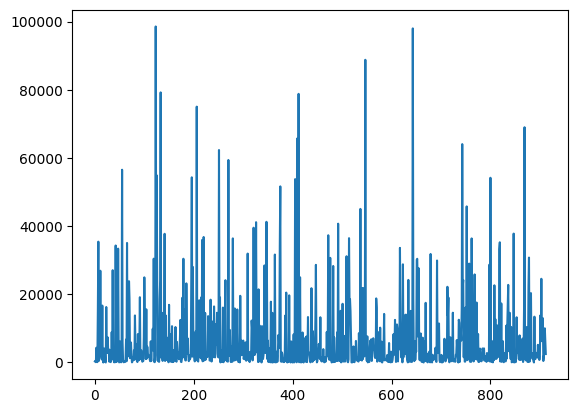

In [24]:
plt.plot(flood['gfd_area']);

### Binning

ใช้ histogram ดู Bin ที่เหมาะสม

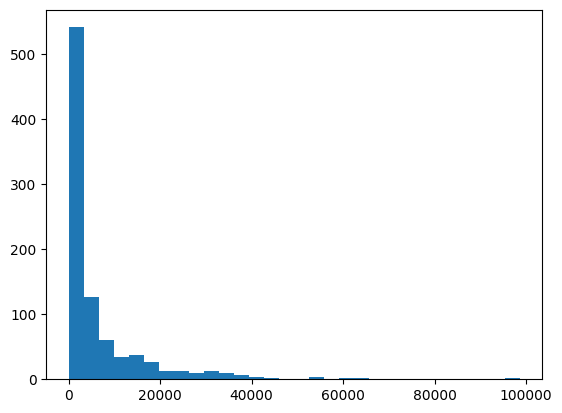

In [25]:
plt.hist(flood['gfd_area'],30);

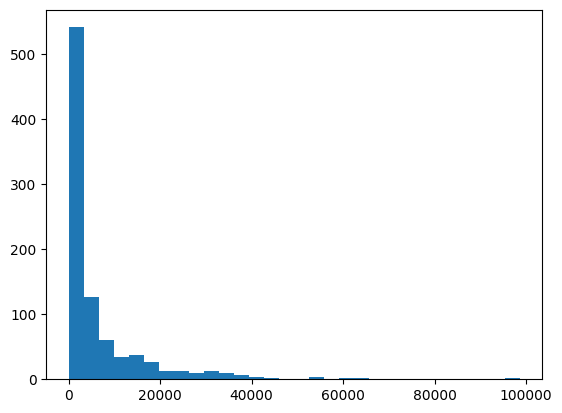

In [26]:
outputhist = plt.hist(flood['gfd_area'],30)

In [27]:
outputhist

(array([541., 126.,  61.,  35.,  38.,  26.,  12.,  13.,  10.,  12.,   9.,
          7.,   4.,   2.,   0.,   1.,   4.,   1.,   2.,   2.,   0.,   1.,
          1.,   1.,   1.,   0.,   0.,   1.,   0.,   2.]),
 array([    0.        ,  3284.92066667,  6569.84133333,  9854.762     ,
        13139.68266667, 16424.60333333, 19709.524     , 22994.44466667,
        26279.36533333, 29564.286     , 32849.20666667, 36134.12733333,
        39419.048     , 42703.96866667, 45988.88933333, 49273.81      ,
        52558.73066667, 55843.65133333, 59128.572     , 62413.49266667,
        65698.41333333, 68983.334     , 72268.25466667, 75553.17533333,
        78838.096     , 82123.01666667, 85407.93733333, 88692.858     ,
        91977.77866667, 95262.69933333, 98547.62      ]),
 <BarContainer object of 30 artists>)

In [28]:
outputhist[1]

array([    0.        ,  3284.92066667,  6569.84133333,  9854.762     ,
       13139.68266667, 16424.60333333, 19709.524     , 22994.44466667,
       26279.36533333, 29564.286     , 32849.20666667, 36134.12733333,
       39419.048     , 42703.96866667, 45988.88933333, 49273.81      ,
       52558.73066667, 55843.65133333, 59128.572     , 62413.49266667,
       65698.41333333, 68983.334     , 72268.25466667, 75553.17533333,
       78838.096     , 82123.01666667, 85407.93733333, 88692.858     ,
       91977.77866667, 95262.69933333, 98547.62      ])

In [29]:
def put_value_into_bins(value, bins_edges):
    for i in range(len(bins_edges) - 1):
        if value >= bins_edges[i] and value < bins_edges[i + 1]:
            new_val = bins_edges[i] + (bins_edges[i + 1] - bins_edges[i]) / 2
            return new_val
    return None

In [30]:
put_value_into_bins(3000, outputhist[1])

np.float64(1642.4603333333332)

In [31]:
put_value_into_bins(7000, outputhist[1])

np.float64(8212.301666666666)

In [32]:
flood['gfd_area_bin'] = flood['gfd_area'].apply(lambda x : put_value_into_bins(x, outputhist[1]))

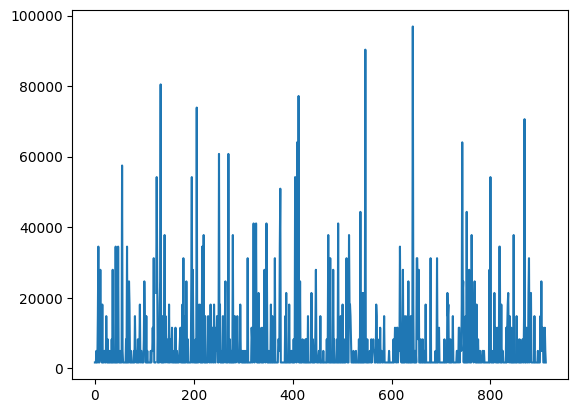

In [33]:
plt.plot(flood['gfd_area_bin']);

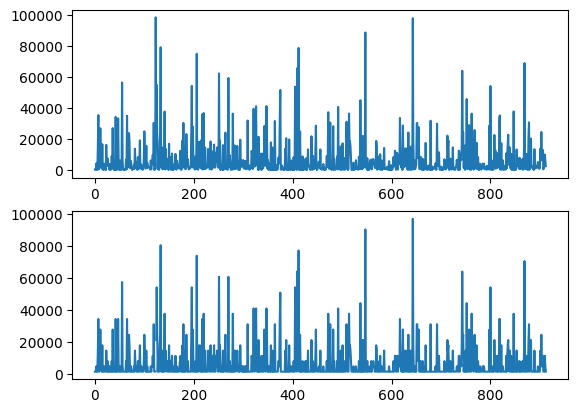

In [34]:
plt.subplot(2,1,1)
plt.plot(flood['gfd_area'])
plt.subplot(2,1,2)
plt.plot(flood['gfd_area_bin'])

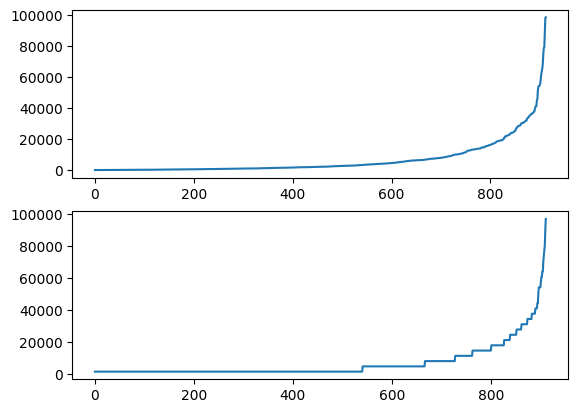

In [35]:
plt.subplot(2,1,1)
plt.plot(flood['gfd_area'].sort_values().reset_index(drop = True))
plt.subplot(2,1,2)
plt.plot(flood['gfd_area_bin'].sort_values().reset_index(drop = True))

### Outlier Removal

{'whiskers': [<matplotlib.lines.Line2D at 0x79da456cb350>,
 'caps': [<matplotlib.lines.Line2D at 0x79da456ca000>,
 'boxes': [<matplotlib.lines.Line2D at 0x79da457375c0>],
 'medians': [<matplotlib.lines.Line2D at 0x79da463bfa70>],
 'fliers': [<matplotlib.lines.Line2D at 0x79da4612bc80>],
 'means': []}

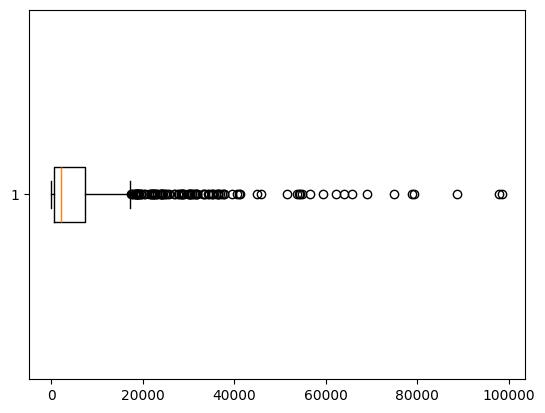

In [36]:
plt.boxplot(flood['gfd_area'],vert=False)

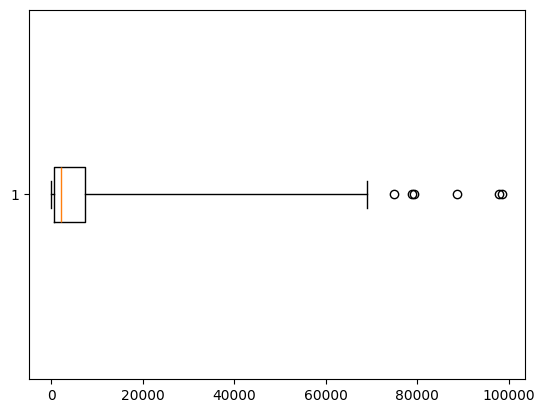

In [37]:
outputbox = plt.boxplot(flood['gfd_area'],vert=False,whis=10)

In [38]:
outputbox

{'whiskers': [<matplotlib.lines.Line2D at 0x79da454831a0>,
 'caps': [<matplotlib.lines.Line2D at 0x79da45483710>,
 'boxes': [<matplotlib.lines.Line2D at 0x79da45482e70>],
 'medians': [<matplotlib.lines.Line2D at 0x79da45483c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x79da45736de0>],
 'means': []}

In [39]:
outputbox['whiskers']

In [40]:
outputbox['whiskers'][0].get_xdata()

array([608.6,   0. ])

In [41]:
outputbox['whiskers'][1].get_xdata()

array([ 7354.55, 68991.93])

In [42]:
outputbox['fliers'][0].get_xdata()

array([98547.62, 79213.43, 75030.8 , 78785.53, 88773.57, 97982.77])

remove outliers

In [43]:
flood_nooutlier = flood[flood['gfd_area'] <
                         outputbox['whiskers'][1].get_xdata()[1]]

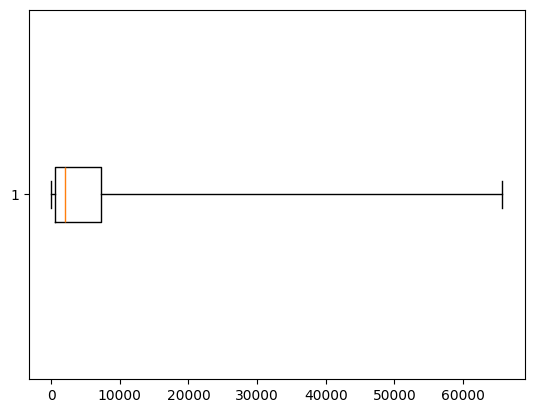

In [44]:
outputbox2 = plt.boxplot(flood_nooutlier['gfd_area'],vert=False,whis=10)

ตามหา outlier

In [45]:
flood[flood['gfd_area'] == outputbox['fliers'][0].get_xdata()[0]]

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000,gfd_area_bin
123,DFO_2208_From_20030416_to_20030528,2208,std,0,Russia,0,64.739289,55.453563,4/16/03,5/28/03,...,1.0,98547.62,1014245.0,1014245.0,931108,1,0,83137,1.0,NaN


# Data Integration

data exploration

In [46]:
project_df = pd.read_csv('/content/drive/MyDrive/Data mining/opendata_project-2.csv')
project_df.head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
0,20809.0,5ec3409884c1860019f3298d,Baan Laksiri Surin-Korco,บ้านหลักศิริ สุรินทร์-คอโค,3,Townhome,ทาวน์โฮม,1490000.0,developer_7326,"LAK SIRI REAL ESTATE CO., LTD.",...,NaN,NaN,1.0,1.0,2020-05-19 09:12:40,NaN,2020-12-04 10:33:10,baania,https://baania.com/th/project/บ้านหลักศิริ-สุร...,2023-06-11
1,4268.0,project_15905,Liberty Park 2,ลิเบอร์ตี้ พาร์ค 2,2,Condo,คอนโด,6500000.0,developer_10510,NaN,...,0.0,0.0,1.0,1.0,2019-06-28 16:06:45,1998-12-31 07:00:00,2020-12-04 10:39:27,baania,https://baania.com/th/project/ลิเบอร์ตี้-พาร์ค...,2023-06-11
2,5849.0,62b2b082cb0d2c0014be01a6,Pleno Paholyothin-Saimai 2,พลีโน่ พหลโยธิน-สายไหม 2,3,Townhome,ทาวน์โฮม,2790000.0,developer_1760,"AP (THAILAND) PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2022-06-22 13:02:42,2024-01-01 07:00:00,2023-03-20 15:00:04,baania,https://baania.com/th/project/พลีโน่-พหลโยธิน-...,2023-06-11
3,21762.0,project_6010,Baan Thara Rin,บ้านธารารินทร์,1,Detached House,บ้าน,3100000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2017-04-19 14:41:10,NaN,2022-11-07 12:30:02,baania,https://baania.com/th/project/บ้านธารารินทร์-p...,2023-06-11
4,10751.0,project_11312,The Forest Hill,เดอะ ฟอเรสต์ ฮิลล์,1,Detached House,บ้าน,2450000.0,developer_7313,"Cholsiri Property Co., Ltd.",...,1.0,NaN,1.0,1.0,2017-10-30 14:10:50,2018-12-31 07:00:00,2022-08-15 16:00:05,baania,https://baania.com/th/project/เดอะ-ฟอเรสต์-ฮิล...,2023-06-11


In [47]:
for i in project_df.columns:
  print(i)

row_number
project_id
name_en
name_th
propertytype_id
propertytype_name_en
propertytype_name_th
price_min
developer_id
developer_name_en
developer_name_th
latitude
longitude
neighborhood_id
neighborhood_name_en
neighborhood_name_th
subdistrict_id
subdistrict_name_en
subdistrict_name_th
district_id
district_name_en
district_name_th
province_id
province_name_en
province_name_th
zipcode
count_elevator
count_elevator_service
count_floor
count_parking
count_tower
count_unit
count_unittype
facility_clubhouse
facility_fitness
facility_meeting
facility_park
facility_playground
facility_pool
facility_security
date_created
date_finish
date_updated
source
url_project
day


In [48]:
unit_df = pd.read_csv('/content/drive/MyDrive/Data mining/opendata_unittype-2.csv')
unit_df.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:17,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:30:02,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,1.0,NaN,NaN,NaN,NaN,2022-03-09 16:30:04,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,1.0,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11


In [49]:
for i in unit_df.columns:
  print(i)

row_number
unittype_id
project_id
name_th
propertytype_id
propertytype_name_en
propertytype_name_th
area_total_min_wa
area_usable_min
price_min
count_airconditioner
count_elevator
count_floor_internal
count_parking
count_room_bath
count_room_bed
count_room_dinning
count_room_guest
count_room_kitchen
count_room_living
count_room_maid
count_room_storage
count_room_utility
date_created
date_updated
source
url_unittype
day


## Add more column to the table (X-Data integration)

```map()```







```
unit_df['project_id'].map(project_df.set_index('project_id')['name_th','developer_name_th',
                                                            'neighborhood_name_th','subdistrict_name_th',
                                                            'district_name_th','province_name_th'])
```



In [81]:
unit_df['project_id'].map(project_df.set_index('project_id')['name_th'])

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

## Deduplication

ดูก่อนว่า Data มัน Duplicate ยังไง

In [51]:
project_df.duplicated().any()

np.True_

In [52]:
project_df.duplicated(keep = False).sum()

np.int64(4)

In [53]:
project_df[project_df.duplicated(keep = False)]

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
138,NaN,ขนส่งปทุม,3611,BAN CHANG,บ้านฉาง,3600,MUEANG PATHUM THANI,เมืองปทุมธานี,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5610,NaN,ขนส่งปทุม,3611,BAN CHANG,บ้านฉาง,3600,MUEANG PATHUM THANI,เมืองปทุมธานี,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8103,NaN,ขนส่งปทุม,3656,BANG PHO NUEA,บางโพธิ์เหนือ,3647,SAM KHOK,สามโคก,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10204,NaN,ขนส่งปทุม,3656,BANG PHO NUEA,บางโพธิ์เหนือ,3647,SAM KHOK,สามโคก,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
project_df.duplicated(subset = ['project_id'], keep = False).sum()

np.int64(6981)

In [55]:
project_df[project_df.duplicated(subset = ['project_id'], keep = False)].head(20).sort_values('project_id')

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
67,15966.0,5e9973839f161600121b5eb3,Nathawadee Grand Park Map Saen Suk,ณฐาวดี แกรนด์ พาร์ค มาบแสนสุข,20000,Twin house,บ้านแฝด,1690000.0,developer_6192,Trinatawat Company Limited,...,1.0,NaN,NaN,1.0,2020-04-17 16:14:43,2021-01-01 07:00:00,2021-01-28 11:00:06,baania,https://baania.com/th/project/ณฐาวดี-แกรนด์-พา...,2023-06-11
78,16607.0,5e9fc23c38be3400128e32d6,Palmprings Promenade,ปาล์มสปริงส์ พรอมานาด,20000,Twin house,บ้านแฝด,3500000.0,developer_8706,NaN,...,1.0,1.0,NaN,1.0,2020-04-22 11:04:12,2021-01-01 07:00:00,2020-12-04 10:33:20,baania,https://baania.com/th/project/ปาล์มสปริงส์-พรอ...,2023-06-11
0,20809.0,5ec3409884c1860019f3298d,Baan Laksiri Surin-Korco,บ้านหลักศิริ สุรินทร์-คอโค,3,Townhome,ทาวน์โฮม,1490000.0,developer_7326,"LAK SIRI REAL ESTATE CO., LTD.",...,NaN,NaN,1.0,1.0,2020-05-19 09:12:40,NaN,2020-12-04 10:33:10,baania,https://baania.com/th/project/บ้านหลักศิริ-สุร...,2023-06-11
8,3795.0,5f04029cb285eb00194de1dd,City park sakaeo,ซิตี้ปาร์ค สระแก้ว 2,4,Commercial,อาคารพาณิชย์,1900000.0,5f03f344b285eb00194de191,"Sa Kaeo Development Co., Ltd.",...,1.0,NaN,NaN,1.0,2020-07-07 12:05:32,2016-01-01 07:00:00,2020-12-04 10:33:25,baania,https://baania.com/th/project/ซิตี้ปาร์ค-สระแก...,2023-06-11
55,10827.0,5f2d191e306e7e0019069070,Supalai Ville Sanphisuea,ศุภาลัย วิลล์ สันผีเสื้อ,3,Townhome,ทาวน์โฮม,2340000.0,developer_97,Supalai Public Company Limited,...,1.0,NaN,NaN,1.0,2020-08-07 16:04:30,2021-01-01 07:00:00,2022-01-24 15:30:04,baania,https://baania.com/th/project/ศุภาลัย-วิลล์-สั...,2023-06-11
34,5047.0,5f34e60ec801fb0019dacbd6,Taraville Pechabura,ธาราวิลล์เพชบุระ,3,Townhome,ทาวน์โฮม,1000000.0,5f34e256c801fb0019dacbbe,"Thanthong Property and Construction Co., Ltd.",...,NaN,NaN,NaN,1.0,2020-08-13 14:04:46,NaN,2022-08-04 15:00:08,baania,https://baania.com/th/project/ธาราวิลล์เพชบุระ...,2023-06-11
83,16779.0,600001780b458100134e49cb,The Ricco Khon Kaen,เดอะ ริคโค่ ขอนแก่น,20000,Twin house,บ้านแฝด,1990000.0,developer_10510,NaN,...,1.0,NaN,NaN,1.0,2021-01-14 15:31:52,NaN,2022-02-11 18:30:06,baania,https://baania.com/th/project/เดอะ-ริคโค่-ขอนแ...,2023-06-11
96,14411.0,project_12286,Au Suite,ออลสวีท,3,Townhome,ทาวน์โฮม,2500000.0,developer_7929,NaN,...,NaN,NaN,1.0,1.0,2017-12-05 16:39:02,NaN,2020-12-04 10:42:14,baania,https://baania.com/th/project/ออลสวีท-project_...,2023-06-11
41,2361.0,project_13214,Phuket Villa Kathu,ภูเก็ต วิลล่า กะทู้,20000,Twin house,บ้านแฝด,2463200.0,developer_8436,"Phuket Villa Co.,Ltd.",...,NaN,1.0,1.0,1.0,2018-05-10 14:27:40,2013-12-31 07:00:00,2020-12-04 10:44:55,baania,https://baania.com/th/project/ภูเก็ต-วิลล่า-กะ...,2023-06-11
79,411.0,project_14357,Sansara,แสนสรา,2,Condo,คอนโด,4000000.0,developer_9131,NaN,...,1.0,0.0,1.0,1.0,2018-08-14 10:31:57,NaN,2022-06-06 14:30:04,baania,https://baania.com/th/project/แสนสรา-project_1...,2023-06-11


ลบข้อมูลที่มี project_id ซ้ำกัน โดยเก็บไว้เฉพาะตัวที่เป็นข้อมูลล่าสุด (ตัวล่าง)

In [56]:
project_df_dedup = project_df.drop_duplicates(subset = ['project_id'], keep = 'last')

map data ที่ไม่มี duplicated index

In [57]:
unit_df['project_id'].map(project_df_dedup.set_index('project_id')['name_th'])

,project_id
0,ไลฟ์ แอท รัชดา - สุทธิสาร
1,บ้านสวนทรัพย์ธานี
2,สกายไลน์ อมตะ
3,รุ่งเรืองทรัพย์วิลเลจ @ กะปาง
4,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ
...,...
43369,บ้านคุรุสภา นครราชสีมา
43370,บ้านเต็มสิริ 1
43371,พระเงิน เพลส
43372,บ้านไทยวิลล่า ศรีราชา


In [58]:
unit_df['ชื่อโครงการ'] = unit_df['project_id'].map(project_df_dedup.set_index('project_id')['name_th'])

# HW3 กลับไปเติมข้อมูล Columns ที่จำเป็นที่เหลือ
('developer_name_th', 'neighborhood_name_th','subdistrict_name_th', 'district_name_th','province_name_th')

In [82]:
unit_df['project_id'].map(project_df_dedup.set_index('project_id')['name_th'])

,project_id
0,ไลฟ์ แอท รัชดา - สุทธิสาร
1,บ้านสวนทรัพย์ธานี
2,สกายไลน์ อมตะ
3,รุ่งเรืองทรัพย์วิลเลจ @ กะปาง
4,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ
...,...
43369,บ้านคุรุสภา นครราชสีมา
43370,บ้านเต็มสิริ 1
43371,พระเงิน เพลส
43372,บ้านไทยวิลล่า ศรีราชา


In [78]:
unit_df['developer_name_th'] = unit_df['project_id'].map(project_df_dedup.set_index('project_id')['developer_name_th'])
unit_df['neighborhood_name_th'] = unit_df['project_id'].map(project_df_dedup.set_index('project_id')['neighborhood_name_th'])
unit_df['subdistrict_name_th'] = unit_df['project_id'].map(project_df_dedup.set_index('project_id')['subdistrict_name_th'])
unit_df['district_name_th'] = unit_df['project_id'].map(project_df_dedup.set_index('project_id')['district_name_th'])
unit_df['province_name_th'] = unit_df['project_id'].map(project_df_dedup.set_index('project_id')['province_name_th'])

In [79]:
unit_df.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11,บ้านสวนทรัพย์ธานี,บริษัท เอส.พี.เอ็น.แลนด์ จำกัด,คลองส่งน้ำ1,ปรุใหญ่,เมืองนครราชสีมา,นครราชสีมา
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11,สกายไลน์ อมตะ,บริษัท เจเคเอส ฟิวเจอร์ จำกัด,อมตะซิตี้ระยอง,มาบยางพร,ปลวกแดง,ระยอง
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11,รุ่งเรืองทรัพย์วิลเลจ @ กะปาง,บริษัท รุ่งเรืองทรัพย์ พร็อพเพอร์ตี้ จำกัด,NaN,กะปาง,ทุ่งสง,นครศรีธรรมราช
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร


## Add more data (Y-data intrgation)

In [84]:
unit_df.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11,บ้านสวนทรัพย์ธานี,บริษัท เอส.พี.เอ็น.แลนด์ จำกัด,คลองส่งน้ำ1,ปรุใหญ่,เมืองนครราชสีมา,นครราชสีมา
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11,สกายไลน์ อมตะ,บริษัท เจเคเอส ฟิวเจอร์ จำกัด,อมตะซิตี้ระยอง,มาบยางพร,ปลวกแดง,ระยอง
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11,รุ่งเรืองทรัพย์วิลเลจ @ กะปาง,บริษัท รุ่งเรืองทรัพย์ พร็อพเพอร์ตี้ จำกัด,NaN,กะปาง,ทุ่งสง,นครศรีธรรมราช
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร


In [85]:
set(unit_df['propertytype_name_th'])

{'คอนโด',
 'ทาวน์โฮม',
 'ที่ดิน',
 'บ้าน',
 'บ้านแฝด',
 'สำนักงาน',
 'อพาตเมนต์',
 'อาคารพาณิชย์',
 'โกดัง / โรงงาน',
 'โรงแรม',
 'โฮมออฟฟิศ'}

สมมติว่า database เก็บแยกชนิดกัน

In [87]:
house = unit_df[unit_df['propertytype_name_th']=='บ้าน']
condo = unit_df[unit_df['propertytype_name_th']=='คอนโด']

In [89]:
house.shape

(17777, 34)

In [90]:
condo.shape

(12806, 34)

รวมข้อมูล บ้าน และ คอนโด

In [91]:
house_condo = pd.concat([house, condo])
house_condo.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6500000.0,...,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4600000.0,...,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,เพลินวิว ทิวเขา,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2790000.0,...,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,พราวเรสซิเดนซ์ @ บ้านพรุ,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5300000.0,...,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บางแสน มหานคร,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี


In [92]:
house_condo.shape

(30583, 34)

## Data Tramsformation

ในกรณีที่ ข้อมูลใน column เดียวกันใช้หน่วยไม่เหมือนกันต้องมีการแปลงข้อมูลก่อน

ทำให้หน่วยของราคา ไม่เท่ากัน (condo หน่วยบาท vs house หน่วยล้านบาท)

In [93]:
house['price_min'] = house['price_min'] / 1000000
house

/tmp/ipython-input-3644753605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['price_min'] = house['price_min'] / 1000000


,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6.5000,...,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4.6000,...,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,เพลินวิว ทิวเขา,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2.7900,...,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,พราวเรสซิเดนซ์ @ บ้านพรุ,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5.3000,...,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บางแสน มหานคร,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43361,2451,unittype_13544,project_5287,บ้านเดี่ยวสองชั้น Type B,1,Detached House,บ้าน,NaN,160.0,3.2000,...,2020-10-14 00:47:42,baania,https://baania.com/th/project/บ้านณัฐชากรีนวิล...,2023-06-11,บ้านณัฐชากรีนวิลล์,NaN,ปลายบาง,บางใหญ่,บางใหญ่,นนทบุรี
43363,1055,unittype_5786,project_1886,กฤษณา PLUS-EV89,1,Detached House,บ้าน,2.0,170.0,3.8614,...,2020-10-14 22:26:15,baania,https://baania.com/th/project/กลันตา-พลัส-อีโค...,2023-06-11,กลันตา พลัส อีโค่ วิลเลจ,บริษัท อีสาน พิมานกรุ๊ป จำกัด,บึงแก่นนคร,พระลับ,เมืองขอนแก่น,ขอนแก่น
43367,20108,630dc1c8713e23001a6a6bb1,630dc0f7713e23001a6a6ba9,Type A,1,Detached House,บ้าน,NaN,186.0,5.3900,...,2023-03-28 14:50:41,baania,https://baania.com/th/project/ชวนชม-5-630dc0f7...,2023-06-11,ชวนชม 5,บริษัท เวลธ์ ดีเวลลอปเปอร์ จำกัด,ไทรน้อย,ไทรน้อย,ไทรน้อย,นนทบุรี
43369,9507,unittype_5086,project_1635,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,0.8800,...,2022-10-19 11:17:08,baania,https://baania.com/th/project/บ้านคุรุสภา-นครร...,2023-06-11,บ้านคุรุสภา นครราชสีมา,NaN,บ้านใหม่1,บ้านใหม่,เมืองนครราชสีมา,นครราชสีมา


ตรวจสอบ scale คร่าวๆ

In [94]:
from matplotlib import pyplot as plt

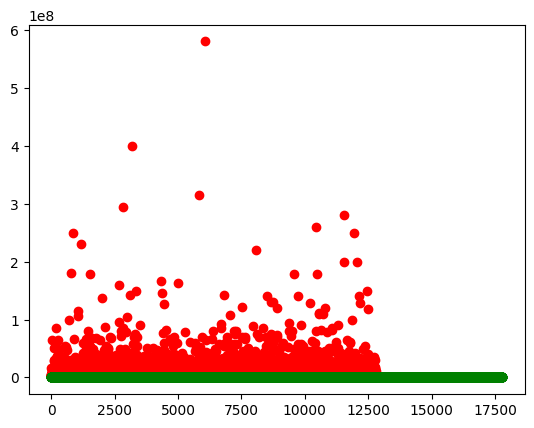

In [95]:
plt.scatter(range(len(condo['price_min'])),condo['price_min'], c='r')
plt.scatter(range(len(house['price_min'])),house['price_min'], c='g')

แปลงค่า หน่วยของ คอนโดให้เป็นหลักล้านแล้วรวม data

/tmp/ipython-input-3024863549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condo['price_min'] = condo['price_min'] / 1000000


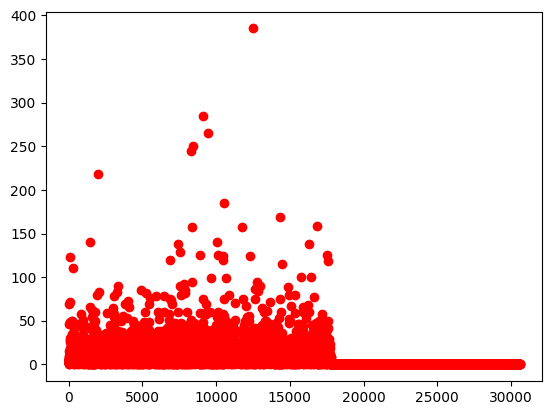

In [98]:
condo['price_min'] = condo['price_min'] / 1000000
condo_house = pd.concat([house, condo])
plt.scatter(range(len(condo_house ['price_min'])),condo_house['price_min'], c='r');

In [102]:
condo_house[condo_house['price_min']>300]

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th
30469,21591,63f6e58e9b028e00130ae6f6,63f6e3b09b028e00130ae6e5,บ้านเดี่ยวสามชั้น,1,Detached House,บ้าน,NaN,2918.0,385.0,...,2023-02-23 11:05:42,baania,https://baania.com/th/project/อสงไขย-63f6e3b09...,2023-06-11,อสงไขย,บริษัท อาเมทัส ดีเวลลอปเม้นท์ จำกัด,เขาพระตำหนัก,หนองปรือ,บางละมุง,ชลบุรี


In [103]:
condo_house[condo_house['price_min']>300]['url_unittype'].values

array(['https://baania.com/th/project/อสงไขย-63f6e3b09b028e00130ae6e5/บ้านเดี่ยวสามชั้น-63f6e58e9b028e00130ae6f6'],
      dtype=object)

## Column Alignment

สลับคอลัมน์ของเดต้าคอนโด

In [104]:
condo.columns

Index(['row_number', 'unittype_id', 'project_id', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th', 'area_total_min_wa',
       'area_usable_min', 'price_min', 'count_airconditioner',
       'count_elevator', 'count_floor_internal', 'count_parking',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'date_created', 'date_updated', 'source', 'url_unittype', 'day',
       'ชื่อโครงการ', 'developer_name_th', 'neighborhood_name_th',
       'subdistrict_name_th', 'district_name_th', 'province_name_th'],
      dtype='object')

In [106]:
columns_titles = ['ชื่อโครงการ', 'developer_name_th', 'neighborhood_name_th',
                  'subdistrict_name_th', 'district_name_th', 'province_name_th',
                  'row_number', 'unittype_id', 'project_id', 'name_th', 'propertytype_id',
                  'propertytype_name_en', 'propertytype_name_th', 'area_total_min_wa',
                  'area_usable_min', 'price_min', 'count_airconditioner',
                  'count_elevator', 'count_floor_internal', 'count_parking',
                  'count_room_bath', 'count_room_bed', 'count_room_dinning',
                  'count_room_guest', 'count_room_kitchen', 'count_room_living',
                  'count_room_maid', 'count_room_storage', 'count_room_utility',
                  'date_created', 'date_updated', 'source', 'url_unittype', 'day']
condo_swap = condo.reindex(columns=columns_titles)

In [107]:
condo_swap.head()

,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th,row_number,unittype_id,project_id,name_th,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร,37586,unittype_35602,project_15270,Studio,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11
4,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),...,1.0,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11
8,ทองหล่อ ทาวเวอร์,NaN,ทองหล่อ,คลองตันเหนือ,วัฒนา,กรุงเทพมหานคร,33884,unittype_36928,project_15818,1 Bedroom,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:22:58,2020-10-14 20:24:11,baania,https://baania.com/th/project/ทองหล่อ-ทาวเวอร์...,2023-06-11
14,จิวเวลรี่ เทรด เซ็นเตอร์,บริษัท ซินเท็ค คอนสตรัคชั่น จำกัด (มหาชน),สีลม,สีลม,บางรัก,กรุงเทพมหานคร,34574,unittype_37590,project_16368,4 Bedroom,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:23:00,2020-10-14 20:27:19,baania,https://baania.com/th/project/จิวเวลรี่-เทรด-เ...,2023-06-11
16,อะไรส์ รัชดา 19,บริษัท ฟอร์จูน พลัส พร็อพเพอร์ตี้ จำกัด,สถานีลาดพร้าว,จอมพล,จตุจักร,กรุงเทพมหานคร,39469,unittype_40049,project_17461,2 Bedroom,...,NaN,NaN,NaN,NaN,NaN,2023-05-11 16:00:05,2023-05-11 15:30:26,baania,https://baania.com/th/project/อะไรส์-รัชดา-19-...,2023-06-11


In [108]:
condoswap_house = pd.concat([condo_swap,house])
condoswap_house.head()

,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th,row_number,unittype_id,project_id,name_th,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร,37586,unittype_35602,project_15270,Studio,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11
4,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),...,1.0,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11
8,ทองหล่อ ทาวเวอร์,NaN,ทองหล่อ,คลองตันเหนือ,วัฒนา,กรุงเทพมหานคร,33884,unittype_36928,project_15818,1 Bedroom,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:22:58,2020-10-14 20:24:11,baania,https://baania.com/th/project/ทองหล่อ-ทาวเวอร์...,2023-06-11
14,จิวเวลรี่ เทรด เซ็นเตอร์,บริษัท ซินเท็ค คอนสตรัคชั่น จำกัด (มหาชน),สีลม,สีลม,บางรัก,กรุงเทพมหานคร,34574,unittype_37590,project_16368,4 Bedroom,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:23:00,2020-10-14 20:27:19,baania,https://baania.com/th/project/จิวเวลรี่-เทรด-เ...,2023-06-11
16,อะไรส์ รัชดา 19,บริษัท ฟอร์จูน พลัส พร็อพเพอร์ตี้ จำกัด,สถานีลาดพร้าว,จอมพล,จตุจักร,กรุงเทพมหานคร,39469,unittype_40049,project_17461,2 Bedroom,...,NaN,NaN,NaN,NaN,NaN,2023-05-11 16:00:05,2023-05-11 15:30:26,baania,https://baania.com/th/project/อะไรส์-รัชดา-19-...,2023-06-11


In [109]:
condoswap_house.tail()

,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th,row_number,unittype_id,project_id,name_th,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
43361,บ้านณัฐชากรีนวิลล์,NaN,ปลายบาง,บางใหญ่,บางใหญ่,นนทบุรี,2451,unittype_13544,project_5287,บ้านเดี่ยวสองชั้น Type B,...,NaN,1.0,NaN,NaN,NaN,2020-12-04 10:38:02,2020-10-14 00:47:42,baania,https://baania.com/th/project/บ้านณัฐชากรีนวิล...,2023-06-11
43363,กลันตา พลัส อีโค่ วิลเลจ,บริษัท อีสาน พิมานกรุ๊ป จำกัด,บึงแก่นนคร,พระลับ,เมืองขอนแก่น,ขอนแก่น,1055,unittype_5786,project_1886,กฤษณา PLUS-EV89,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:24:08,2020-10-14 22:26:15,baania,https://baania.com/th/project/กลันตา-พลัส-อีโค...,2023-06-11
43367,ชวนชม 5,บริษัท เวลธ์ ดีเวลลอปเปอร์ จำกัด,ไทรน้อย,ไทรน้อย,ไทรน้อย,นนทบุรี,20108,630dc1c8713e23001a6a6bb1,630dc0f7713e23001a6a6ba9,Type A,...,NaN,NaN,NaN,NaN,NaN,2023-03-28 15:00:05,2023-03-28 14:50:41,baania,https://baania.com/th/project/ชวนชม-5-630dc0f7...,2023-06-11
43369,บ้านคุรุสภา นครราชสีมา,NaN,บ้านใหม่1,บ้านใหม่,เมืองนครราชสีมา,นครราชสีมา,9507,unittype_5086,project_1635,บ้านเดี่ยวชั้นเดียว,...,1.0,NaN,NaN,NaN,NaN,2022-10-19 11:30:05,2022-10-19 11:17:08,baania,https://baania.com/th/project/บ้านคุรุสภา-นครร...,2023-06-11
43370,บ้านเต็มสิริ 1,NaN,หนองจอก,คู้ฝั่งเหนือ,หนองจอก,กรุงเทพมหานคร,23721,unittype_15644,project_6109,บ้านเดี่ยวสองชั้น,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:24:19,2020-10-14 23:03:19,baania,https://baania.com/th/project/บ้านเต็มสิริ-1-6...,2023-06-11


In [113]:
condo_swap['price_min_bath'] = condo_swap['price_min'] * 1000000

In [111]:
condo_swap.shape

(12806, 35)

In [112]:
house.shape

(17777, 34)

In [116]:
pd.concat([condo_swap, house])

,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th,row_number,unittype_id,project_id,name_th,...,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day,price_min_bath
0,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร,37586,unittype_35602,project_15270,Studio,...,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,3.70
4,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),...,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,4.20
8,ทองหล่อ ทาวเวอร์,NaN,ทองหล่อ,คลองตันเหนือ,วัฒนา,กรุงเทพมหานคร,33884,unittype_36928,project_15818,1 Bedroom,...,NaN,NaN,NaN,NaN,2021-11-12 13:22:58,2020-10-14 20:24:11,baania,https://baania.com/th/project/ทองหล่อ-ทาวเวอร์...,2023-06-11,3.35
14,จิวเวลรี่ เทรด เซ็นเตอร์,บริษัท ซินเท็ค คอนสตรัคชั่น จำกัด (มหาชน),สีลม,สีลม,บางรัก,กรุงเทพมหานคร,34574,unittype_37590,project_16368,4 Bedroom,...,NaN,NaN,NaN,NaN,2021-11-12 13:23:00,2020-10-14 20:27:19,baania,https://baania.com/th/project/จิวเวลรี่-เทรด-เ...,2023-06-11,15.90
16,อะไรส์ รัชดา 19,บริษัท ฟอร์จูน พลัส พร็อพเพอร์ตี้ จำกัด,สถานีลาดพร้าว,จอมพล,จตุจักร,กรุงเทพมหานคร,39469,unittype_40049,project_17461,2 Bedroom,...,NaN,NaN,NaN,NaN,2023-05-11 16:00:05,2023-05-11 15:30:26,baania,https://baania.com/th/project/อะไรส์-รัชดา-19-...,2023-06-11,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43361,บ้านณัฐชากรีนวิลล์,NaN,ปลายบาง,บางใหญ่,บางใหญ่,นนทบุรี,2451,unittype_13544,project_5287,บ้านเดี่ยวสองชั้น Type B,...,1.0,NaN,NaN,NaN,2020-12-04 10:38:02,2020-10-14 00:47:42,baania,https://baania.com/th/project/บ้านณัฐชากรีนวิล...,2023-06-11,NaN
43363,กลันตา พลัส อีโค่ วิลเลจ,บริษัท อีสาน พิมานกรุ๊ป จำกัด,บึงแก่นนคร,พระลับ,เมืองขอนแก่น,ขอนแก่น,1055,unittype_5786,project_1886,กฤษณา PLUS-EV89,...,NaN,NaN,NaN,NaN,2021-11-12 13:24:08,2020-10-14 22:26:15,baania,https://baania.com/th/project/กลันตา-พลัส-อีโค...,2023-06-11,NaN
43367,ชวนชม 5,บริษัท เวลธ์ ดีเวลลอปเปอร์ จำกัด,ไทรน้อย,ไทรน้อย,ไทรน้อย,นนทบุรี,20108,630dc1c8713e23001a6a6bb1,630dc0f7713e23001a6a6ba9,Type A,...,NaN,NaN,NaN,NaN,2023-03-28 15:00:05,2023-03-28 14:50:41,baania,https://baania.com/th/project/ชวนชม-5-630dc0f7...,2023-06-11,NaN
43369,บ้านคุรุสภา นครราชสีมา,NaN,บ้านใหม่1,บ้านใหม่,เมืองนครราชสีมา,นครราชสีมา,9507,unittype_5086,project_1635,บ้านเดี่ยวชั้นเดียว,...,NaN,NaN,NaN,NaN,2022-10-19 11:30:05,2022-10-19 11:17:08,baania,https://baania.com/th/project/บ้านคุรุสภา-นครร...,2023-06-11,NaN


In [117]:
pd.concat([house, condo_swap])

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,source,url_unittype,day,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th,price_min_bath
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี,NaN
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6.500000,...,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต,NaN
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4.600000,...,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,เพลินวิว ทิวเขา,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี,NaN
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2.790000,...,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,พราวเรสซิเดนซ์ @ บ้านพรุ,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา,NaN
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5.300000,...,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บางแสน มหานคร,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43355,17263,60488b2e582962001402e663,60488aeca8b9ee0013d7ebac,1 Bedroom,2,Condo,คอนโด,NaN,NaN,NaN,...,baania,https://baania.com/th/project/เดอะ-ไพรเวซี่-พา...,2023-06-11,เดอะ ไพรเวซี่ พาร์ค รามอินทรา,บริษัท พฤกษา เรียลเอสเตท จำกัด (มหาชน),วัดไตรรัตนาราม,อนุสาวรีย์,บางเขน,กรุงเทพมหานคร,NaN
43357,32766,unittype_32126,project_13619,1 Bedroom,2,Condo,คอนโด,NaN,31.0,0.000006,...,baania,https://baania.com/th/project/วาลเด้น-อโศก-136...,2023-06-11,วาลเด้น อโศก,บริษัท ฮาบิแทท กรุ๊ป จำกัด,อโศก,คลองเตยเหนือ,วัฒนา,กรุงเทพมหานคร,6.50
43364,12599,unittype_24778,project_9877,2 Bedroom,2,Condo,คอนโด,NaN,49.0,0.000003,...,baania,https://baania.com/th/project/ซีซี-คอนโดมิเนีย...,2023-06-11,ซีซี คอนโดมิเนียม 2,บริษัท รวมโชคพัฒนา (พัทยา) จำกัด,บุญสัมพันธ์,หนองปรือ,บางละมุง,ชลบุรี,3.50
43366,11147,unittype_35831,project_15356,Studio,2,Condo,คอนโด,NaN,27.0,0.000005,...,baania,https://baania.com/th/project/ไอดีโอ-โมบิ-รางน...,2023-06-11,ไอดีโอ โมบิ รางน้ำ,บริษัท อนันดา ดีเวลลอปเม้นท์ จำกัด (มหาชน),รางน้ำ,ถนนพญาไท,ราชเทวี,กรุงเทพมหานคร,4.99


## Add Data source Column

เตรียมปัญหาโดย ลบ column property type ออก

In [118]:
house.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6.50,...,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4.60,...,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,เพลินวิว ทิวเขา,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2.79,...,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,พราวเรสซิเดนซ์ @ บ้านพรุ,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5.30,...,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บางแสน มหานคร,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี


In [119]:
house=house.drop(columns=['propertytype_id','propertytype_name_en','propertytype_name_th'])
condo=condo.drop(columns=['propertytype_id','propertytype_name_en','propertytype_name_th'])

In [120]:
condo.head()

,row_number,unittype_id,project_id,name_th,area_total_min_wa,area_usable_min,price_min,count_airconditioner,count_elevator,count_floor_internal,...,date_updated,source,url_unittype,day,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th
0,37586,unittype_35602,project_15270,Studio,NaN,30.00,0.000004,NaN,NaN,NaN,...,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),NaN,48.00,0.000004,NaN,NaN,NaN,...,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร
8,33884,unittype_36928,project_15818,1 Bedroom,NaN,49.00,0.000003,NaN,NaN,NaN,...,2020-10-14 20:24:11,baania,https://baania.com/th/project/ทองหล่อ-ทาวเวอร์...,2023-06-11,ทองหล่อ ทาวเวอร์,NaN,ทองหล่อ,คลองตันเหนือ,วัฒนา,กรุงเทพมหานคร
14,34574,unittype_37590,project_16368,4 Bedroom,NaN,170.00,0.000016,NaN,NaN,NaN,...,2020-10-14 20:27:19,baania,https://baania.com/th/project/จิวเวลรี่-เทรด-เ...,2023-06-11,จิวเวลรี่ เทรด เซ็นเตอร์,บริษัท ซินเท็ค คอนสตรัคชั่น จำกัด (มหาชน),สีลม,สีลม,บางรัก,กรุงเทพมหานคร
16,39469,unittype_40049,project_17461,2 Bedroom,NaN,48.88,0.000005,NaN,NaN,NaN,...,2023-05-11 15:30:26,baania,https://baania.com/th/project/อะไรส์-รัชดา-19-...,2023-06-11,อะไรส์ รัชดา 19,บริษัท ฟอร์จูน พลัส พร็อพเพอร์ตี้ จำกัด,สถานีลาดพร้าว,จอมพล,จตุจักร,กรุงเทพมหานคร


In [121]:
# Add a 'source_data' column to house DataFrame
house_with_source = house.copy()
house_with_source['source_data'] = 'house'

# Add a 'source_data' column to condo DataFrame
condo_with_source = condo.copy()
condo_with_source['source_data'] = 'condo'

# Concatenate the two DataFrames
combined_data_with_source = pd.concat([house_with_source, condo_with_source])

print("Combined DataFrame with 'source_data' column (first 5 rows):")
display(combined_data_with_source.head())
print("\nCombined DataFrame with 'source_data' column (last 5 rows):")
display(combined_data_with_source.tail())
print(f"\nShape of the combined DataFrame: {combined_data_with_source.shape}")

Combined DataFrame with 'source_data' column (first 5 rows):


,row_number,unittype_id,project_id,name_th,area_total_min_wa,area_usable_min,price_min,count_airconditioner,count_elevator,count_floor_internal,...,source,url_unittype,day,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th,source_data
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,NaN,NaN,NaN,NaN,NaN,2.0,...,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี,house
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,NaN,100.0,6.50,NaN,NaN,2.0,...,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต,house
10,12753,unittype_24670,project_9840,วนิดา,NaN,203.0,4.60,NaN,NaN,2.0,...,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,เพลินวิว ทิวเขา,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี,house
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,NaN,NaN,2.79,NaN,NaN,1.0,...,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,พราวเรสซิเดนซ์ @ บ้านพรุ,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา,house
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,NaN,215.0,5.30,NaN,NaN,2.0,...,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บางแสน มหานคร,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี,house



Combined DataFrame with 'source_data' column (last 5 rows):


,row_number,unittype_id,project_id,name_th,area_total_min_wa,area_usable_min,price_min,count_airconditioner,count_elevator,count_floor_internal,...,source,url_unittype,day,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th,source_data
43355,17263,60488b2e582962001402e663,60488aeca8b9ee0013d7ebac,1 Bedroom,NaN,NaN,NaN,NaN,NaN,NaN,...,baania,https://baania.com/th/project/เดอะ-ไพรเวซี่-พา...,2023-06-11,เดอะ ไพรเวซี่ พาร์ค รามอินทรา,บริษัท พฤกษา เรียลเอสเตท จำกัด (มหาชน),วัดไตรรัตนาราม,อนุสาวรีย์,บางเขน,กรุงเทพมหานคร,condo
43357,32766,unittype_32126,project_13619,1 Bedroom,NaN,31.0,0.000006,NaN,NaN,NaN,...,baania,https://baania.com/th/project/วาลเด้น-อโศก-136...,2023-06-11,วาลเด้น อโศก,บริษัท ฮาบิแทท กรุ๊ป จำกัด,อโศก,คลองเตยเหนือ,วัฒนา,กรุงเทพมหานคร,condo
43364,12599,unittype_24778,project_9877,2 Bedroom,NaN,49.0,0.000003,NaN,NaN,NaN,...,baania,https://baania.com/th/project/ซีซี-คอนโดมิเนีย...,2023-06-11,ซีซี คอนโดมิเนียม 2,บริษัท รวมโชคพัฒนา (พัทยา) จำกัด,บุญสัมพันธ์,หนองปรือ,บางละมุง,ชลบุรี,condo
43366,11147,unittype_35831,project_15356,Studio,NaN,27.0,0.000005,NaN,NaN,NaN,...,baania,https://baania.com/th/project/ไอดีโอ-โมบิ-รางน...,2023-06-11,ไอดีโอ โมบิ รางน้ำ,บริษัท อนันดา ดีเวลลอปเม้นท์ จำกัด (มหาชน),รางน้ำ,ถนนพญาไท,ราชเทวี,กรุงเทพมหานคร,condo
43373,9465,unittype_35686,project_15298,2 Bedroom,NaN,45.0,0.000003,NaN,NaN,NaN,...,baania,https://baania.com/th/project/แกรนด์-คอนโดมิเน...,2023-06-11,แกรนด์ คอนโดมิเนียม วุฒากาศ 57,บริษัท โมเดิร์น เฮาส์ พร็อพเพอร์ตี้ จำกัด,จอมทอง,บางค้อ,จอมทอง,กรุงเทพมหานคร,condo



Shape of the combined DataFrame: (30583, 32)


In [122]:
# Add a 'source_data' column to house DataFrame
house_with_source = house.copy()
house_with_source['source_data'] = 'house'

# Add a 'source_data' column to condo DataFrame
condo_with_source = condo.copy()
condo_with_source['source_data'] = 'condo'

# Concatenate the two DataFrames
combined_data_with_source = pd.concat([house_with_source, condo_with_source])

In [123]:
combined_data_with_source

,row_number,unittype_id,project_id,name_th,area_total_min_wa,area_usable_min,price_min,count_airconditioner,count_elevator,count_floor_internal,...,source,url_unittype,day,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th,source_data
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,NaN,NaN,NaN,NaN,NaN,2.0,...,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี,house
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,NaN,100.0,6.500000,NaN,NaN,2.0,...,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต,house
10,12753,unittype_24670,project_9840,วนิดา,NaN,203.0,4.600000,NaN,NaN,2.0,...,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,เพลินวิว ทิวเขา,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี,house
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,NaN,NaN,2.790000,NaN,NaN,1.0,...,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,พราวเรสซิเดนซ์ @ บ้านพรุ,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา,house
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,NaN,215.0,5.300000,NaN,NaN,2.0,...,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บางแสน มหานคร,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี,house
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43355,17263,60488b2e582962001402e663,60488aeca8b9ee0013d7ebac,1 Bedroom,NaN,NaN,NaN,NaN,NaN,NaN,...,baania,https://baania.com/th/project/เดอะ-ไพรเวซี่-พา...,2023-06-11,เดอะ ไพรเวซี่ พาร์ค รามอินทรา,บริษัท พฤกษา เรียลเอสเตท จำกัด (มหาชน),วัดไตรรัตนาราม,อนุสาวรีย์,บางเขน,กรุงเทพมหานคร,condo
43357,32766,unittype_32126,project_13619,1 Bedroom,NaN,31.0,0.000006,NaN,NaN,NaN,...,baania,https://baania.com/th/project/วาลเด้น-อโศก-136...,2023-06-11,วาลเด้น อโศก,บริษัท ฮาบิแทท กรุ๊ป จำกัด,อโศก,คลองเตยเหนือ,วัฒนา,กรุงเทพมหานคร,condo
43364,12599,unittype_24778,project_9877,2 Bedroom,NaN,49.0,0.000003,NaN,NaN,NaN,...,baania,https://baania.com/th/project/ซีซี-คอนโดมิเนีย...,2023-06-11,ซีซี คอนโดมิเนียม 2,บริษัท รวมโชคพัฒนา (พัทยา) จำกัด,บุญสัมพันธ์,หนองปรือ,บางละมุง,ชลบุรี,condo
43366,11147,unittype_35831,project_15356,Studio,NaN,27.0,0.000005,NaN,NaN,NaN,...,baania,https://baania.com/th/project/ไอดีโอ-โมบิ-รางน...,2023-06-11,ไอดีโอ โมบิ รางน้ำ,บริษัท อนันดา ดีเวลลอปเม้นท์ จำกัด (มหาชน),รางน้ำ,ถนนพญาไท,ราชเทวี,กรุงเทพมหานคร,condo
